PROJETO DE AUTOMATIZAÇÃO DE COLETA DE DADOS DE ITENS EM PROMOÇÃO NO SITE 

* Acessar o site e verificar os itens em promoção de acordo com a escolha da categoria
* Salvar um planilha em excel com o nome da categoria com os dados buscados no site
* Printar um gráfico com a quantidade de itens por percentual de desconto

* Importação das bibliotecas necessárias para o projeto

In [61]:
# Importando as bibliotecas necessárias Firefox
import pandas as pd
from selenium import webdriver
from selenium.webdriver.firefox.service import Service
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import ElementClickInterceptedException, NoSuchElementException, TimeoutException
import matplotlib.pyplot as plt

* Configurações GeckoDriver

In [62]:
# Usar o GeckoDriverManager para garantir que o geckodriver esteja atualizado e configurado corretamente
service = Service(GeckoDriverManager().install())  # GeckoDriverManager vai cuidar do caminho
nav = webdriver.Firefox(service=service)

* Links disponíveis no site

In [63]:
#Links
# Promoções Séries e Coleções: https://www.videoperola.com.br/todas-as-categorias/promocoes/promocoes-de-series-e-colecoes/
# Promoções de DVD: https://www.videoperola.com.br/todas-as-categorias/promocoes/promocoes-de-dvd/
# Saldão de Primavera: https://www.videoperola.com.br/todas-as-categorias/promocoes/saldao-de-primavera/
# Promoção de Primavera: https://www.videoperola.com.br/todas-as-categorias/promocoes/promocao-de-primavera/
# Liquidação de Férias (Sazonal): https://www.videoperola.com.br/todas-as-categorias/liquidacao-de-ferias/
# Promoção Exclusiva (Sazonal): https://www.videoperola.com.br/search/?q=dvd02
# Promoção de Blu-ray: https://www.videoperola.com.br/todas-as-categorias/promocoes/promocoes-de-blu-ray/
# Oferta Blu-ray a partir de R$7,99 (Sazonal): https://www.videoperola.com.br/search/?q=bd01


* Exibindo o menu de opções do site

In [64]:
menu = print('''Opções para pesquisa de preços:
        
        1 - Promoções de DVD
        2 - Promoções Séries e Coleções
        3 - Saldão de Primavera
        4 - Promoção de Primavera
        5 - Liquidação de Férias (Sazonal)
        6 - Promoção Exclusiva (Sazonal)
        7 - Promoções de Blu-ray
        8 - Oferta Blu-ray a partir de R$7,99 (Sazonal)
        '''
)

Opções para pesquisa de preços:
        
        1 - Promoções de DVD
        2 - Promoções Séries e Coleções
        3 - Saldão de Primavera
        4 - Promoção de Primavera
        5 - Liquidação de Férias (Sazonal)
        6 - Promoção Exclusiva (Sazonal)
        7 - Promoções de Blu-ray
        8 - Oferta Blu-ray a partir de R$7,99 (Sazonal)
        


* Criando condição para que sejam digitadas opções válidas de pesquisa no site 

In [65]:
while True:
    try:
        link = int(input("Digite o número de acordo com a opção desejada (1 a 8): "))
        if 1 <= link <= 8:
            break
        else:
            print("Opção inválida. Escolha um número entre 1 e 8.")
            
    except ValueError:
        print("Por favor, digite um número válido.")
if link == 1:
    link = 'https://www.videoperola.com.br/todas-as-categorias/promocoes/promocoes-de-dvd/'
    print("Buscando itens em PROMOÇÕES DE DVDs...")
elif link == 2:
    link = 'https://www.videoperola.com.br/todas-as-categorias/promocoes/promocoes-de-series-e-colecoes/'
    print("Buscando itens em PROMOÇÕES DE SÉRIES E COLEÇÕES...")
elif link == 3:
    link = 'https://www.videoperola.com.br/todas-as-categorias/promocoes/saldao-de-primavera/'
    print("Buscando itens em SALDÃO DE PRIMAVERA...")
elif link == 4:
    link = 'https://www.videoperola.com.br/todas-as-categorias/promocoes/promocao-de-primavera/'
    print("Buscando itens em PROMOÇÃO DE PRIMAVERA...")
elif link == 5:
    link = 'https://www.videoperola.com.br/todas-as-categorias/liquidacao-de-ferias/'
    print("LIQUIDAÇÃO DE FÉRIAS (Sazonal)...")
elif link == 6:
    link = 'https://www.videoperola.com.br/search/?q=dvd02'
    print("Buscando itens PROMOÇÃO EXCLUSIVA (Sazonal)...")
elif link == 7:
    link = 'https://www.videoperola.com.br/todas-as-categorias/promocoes/promocoes-de-blu-ray/'
    print('Buscando itens PROMOÇÕES DE BLU-RAY...')
elif link == 8:
    link = 'https://www.videoperola.com.br/search/?q=bd01'
    print('Buscando itens OFERTA BLU-RAY A PARTIR DE R$7,99...')


LIQUIDAÇÃO DE FÉRIAS (Sazonal)...


* Inserindo o link no navegador

In [66]:
nav.get(link)

* Maximizando a tela do navegador

In [67]:
nav.maximize_window()

* Removendo as notificações (banners, pop-ups do site)

In [68]:
# Remove todas as notificações da tela via JavaScript
nav.execute_script("document.querySelectorAll('.beon-notificacao__inner').forEach(e => e.style.display = 'none');")

* Condição para tratamento do título do site

In [69]:
if link == 'https://www.videoperola.com.br/search/?q=dvd02':
    titulo_site = "Promoção Exclusiva"
elif link == 'https://www.videoperola.com.br/search/?q=bd01':
    titulo_site = "Oferta Blu-ray"  
else:
    titulo_site = nav.find_element(By.CSS_SELECTOR, 'h1.text-center').text    

* Coleta de dados do site

In [70]:
# Inicializa a lista para armazenar todos os itens e links
todos_itens = []
# Loop de coleta de itens enquanto a navegação continuar
while True:
    try:
        # Espera até que os itens sejam visíveis antes de coletá-los
        itens = WebDriverWait(nav, 10).until(
            EC.visibility_of_all_elements_located((By.CSS_SELECTOR, ".item.item-rounded.item-product.box-rounded.p-0"))
        )        
        lista_links = nav.find_elements(By.CSS_SELECTOR, ".item-image")
        
        if not itens or not lista_links:
            print("Nenhum item ou link encontrado.")
            break  # Se não encontrar itens ou links, encerra o loop
        
        for item, elemento in zip(itens, lista_links):
            if "ESGOTADO" in item.text.upper():
                print("Fim da pesquisa...\n")
                print("Navegação completa. Exibindo todos os itens coletados:\n")
                break  # Interrompe o loop quando encontrar "ESGOTADO"
            
            # Extraindo o link
            link_element = elemento.find_element(By.TAG_NAME, 'a')
            link = link_element.get_attribute('href')
            
            # Armazena o texto e link na lista todos_itens
            todos_itens.append((item.text, link))
        
        # Se encontrou "ESGOTADO", interrompe o loop externo
        if "ESGOTADO" in item.text.upper():
            break

        # Remove o banner de notificação, caso ele apareça na tela
        nav.execute_script("document.querySelectorAll('.js-notification, .beon-notificacao__inner').forEach(e => e.style.display = 'none');")
        
        # Localiza o botão "próxima página" e clica se disponível
        botao_proximo = WebDriverWait(nav, 10).until(
            EC.element_to_be_clickable((By.XPATH, "//a[contains(@class, 'pagination-arrow-link') and text()='»']"))
        )
        
        botao_proximo.click()  # Clica no botão de próxima página
        
        # Aguardar até que o botão "próxima página" se torne obsoleto após o clique
        WebDriverWait(nav, 10).until(EC.staleness_of(botao_proximo))

    except TimeoutException:
        print("Não há mais dados para navegar. Fim da coleta.")
        break # Sai do loop se não encontrar o botão de próxima página
        
    except ElementClickInterceptedException:
        # Caso o clique seja interceptado por algum elemento (como banner), tenta novamente
        print("Clique interceptado, tentando novamente...")
        nav.execute_script("document.querySelectorAll('.js-notification, .beon-notificacao__inner').forEach(e => e.style.display = 'none');")
        
    except NoSuchElementException:
        # Se o botão "próxima página" não for encontrado, encerra o loop
        print("Navegação completa:")
        break
    
    except Exception as e:
        break
# Exibe todos os itens e links coletados após o loop
for texto, link in todos_itens:
    print(f"{texto}\nLink: {link}\n")

# Finaliza o driver (fecha o navegador) ao final do processo
nav.quit()

Não há mais dados para navegar. Fim da coleta.
67% OFF
Steelbook - Blu-Ray + Blu-Ray 3d - Os Incríveis 2
de R$119,90
por R$39,90
ou R$35,91 à vista
2x de R$19,95 sem juros
Link: https://videoperola.com.br/produtos/steelbook-blu-ray-blu-ray-3d-os-incriveis-2/

88% OFF
Blu-ray - Valente
de R$39,90
por R$4,90
ou R$4,41 à vista
Link: https://videoperola.com.br/produtos/blu-ray-valente/

72% OFF
Blu-ray 2D + Blu-ray 3D - O Hobbit: A Desolação de Smaug
de R$69,90
por R$19,90
ou R$17,91 à vista
2x de R$9,95 sem juros
Link: https://videoperola.com.br/produtos/blu-ray-2d-blu-ray-3d-o-hobbit-a-desolacao-de-smaug1/

75% OFF
DVD - Prometheus
de R$19,90
por R$4,90
ou R$4,41 à vista
Link: https://videoperola.com.br/produtos/dvd-prometheus/

84% OFF
DVD - Toy Story 3
de R$29,90
por R$4,90
ou R$4,41 à vista
Link: https://videoperola.com.br/produtos/dvd-toy-story-3/

88% OFF
DVD Duplo - Jogos Vorazes e Jogos Vorazes: Em Chamas
de R$39,90
por R$4,90
ou R$4,41 à vista
Link: https://videoperola.com.br/pro

* Armazenando os dados coletados

In [71]:
# Inicializa a lista para armazenar os dados processados
lista_produtos = []
tabela = pd.DataFrame(todos_itens)

# Processa cada dado na coluna 0 da tabela
for dado in tabela.iloc[:, 0]:
    # Verifica se o dado é uma string antes de aplicar `strip`
    if isinstance(dado, str):
        # Divide os dados usando a quebra de linha como delimitador
        dados_divididos = dado.strip().split('\n')
        # Limpeza de espaços em branco
        dados_divididos = [linha.strip() for linha in dados_divididos]
    else:
        dados_divididos = ["Não se aplica"]
    
    # Se o registro tiver menos que 6 linhas, preenche com "Não se aplica"
    while len(dados_divididos) < 6:
        dados_divididos.append("Não se aplica")
    
    # Adiciona o registro processado à lista de produtos
    lista_produtos.append(dados_divididos)

* Compilando os dados coletados

In [72]:
# Inicializa a lista para armazenar os dados processados
lista_produtos = []

# Processa cada dado na coluna 0 da tabela
for dado in tabela.iloc[:, 0]:
    # Verifica se o dado é uma string antes de aplicar `strip`
    if isinstance(dado, str):
        # Divide os dados usando a quebra de linha como delimitador
        dados_divididos = dado.strip().split('\n')
        # Limpeza de espaços em branco
        dados_divididos = [linha.strip() for linha in dados_divididos]
    else:
        dados_divididos = ["Não se aplica"]
    
    # Verifica se o primeiro item (Desconto) contém "OFF" para identificar se é um desconto válido
    if "OFF" in dados_divididos[0]:
        desconto = dados_divididos[0]
        produto = dados_divididos[1]
        preco_original = dados_divididos[2]
        preco_promocional = dados_divididos[3]
        preco_avista = dados_divididos[4]
        parcelado = dados_divididos[5] if len(dados_divididos) > 5 else "Não se aplica"

    else:
        desconto = "Não se aplica"
        produto = dados_divididos[0]
        preco_original = dados_divididos[1]
        preco_promocional = dados_divididos[2]
        preco_avista = dados_divididos[3]
        parcelado = dados_divididos[4] if len(dados_divididos) > 4 else "Não se aplica"

    # Adiciona a linha processada à lista de produtos
    lista_produtos.append([desconto, produto, preco_original, preco_promocional, preco_avista, parcelado])

# Cria o DataFrame com as colunas corretas
df = pd.DataFrame(lista_produtos, columns=["Desconto", "Produto", "Preco_original", "Preco_promocional", "Preco_avista", "Parcelado"])
df["Links"] = tabela.iloc[:, 1].values

* Ralizando correção para problemas nos dados

In [73]:
# Supondo que você tenha o DataFrame `df`:
if isinstance(df.index, pd.RangeIndex):  # Verifica se o índice é um RangeIndex
    df = df.iloc[:, :]  # Aplica a indexação correta para acessar todas as colunas, por exemplo
else:
    # Lógica de correção ou processamento alternativo
    print("Erro: O índice não é um RangeIndex. Ajuste a indexação para evitar problemas.")

In [74]:
df_filtada = df[df['Produto'] != "LANÇAMENTO"].copy()

* Impressão de itens por percentual de desconto

In [75]:
#Criando o eixo de quantidade de produtos com desconto
contagem_descontos= df['Desconto'].value_counts()

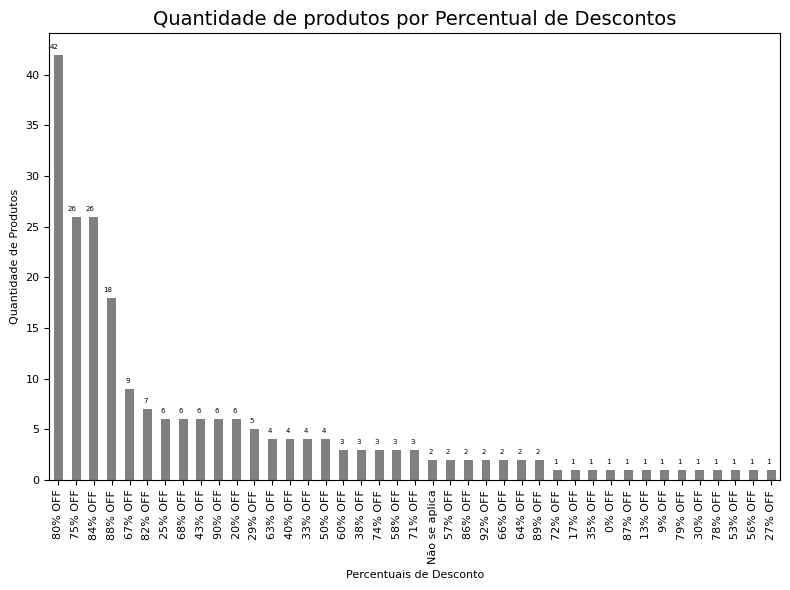

In [76]:
# Plotando o gráfico de barras
plt.figure(figsize=(8,6))
ax = contagem_descontos.plot(kind='bar', color='grey', fontsize=8)  # Usando o resultado de value_counts() para o gráfico
plt.xlabel('Percentuais de Desconto', fontsize=8)
plt.ylabel('Quantidade de Produtos', fontsize=8)
plt.title('Quantidade de produtos por Percentual de Descontos', fontsize=14)
#plt.xticks(rotation=90, ha='right')  # Rotaciona os rótulos do eixo X para melhor legibilidade

# Adicionando os valores nas barras
for i, v in enumerate(contagem_descontos):
    ax.text(i, v + 0.5, str(v), ha='right', va='bottom', fontsize=5)

plt.tight_layout()
plt.show()

* Pré tratamento dos dados

In [77]:
df_filtada['%_desc'] = (
    df_filtada['Desconto']
    .str.extract(r'(\d+)')
    .astype(float)
)
df_filtada[['Tipo de Midia', 'Titulo Midia']] = (
    df_filtada['Produto'].str.split(' - ', n=1, expand=True)
)
# Criar uma nova coluna com apenas os números após "de R$"
df_filtada['Preco_'] = (
    df_filtada['Preco_original']
    .str.extract(r'de R\$(\d+,\d+)')[0]
    .str.replace(',', '.')
    .astype(float)

)

df_filtada['Preco_promocao'] = (
    df_filtada['Preco_promocional']
    .str.extract(r'por R\$(\d+,\d+)')[0]
    .str.replace(',', '.')
    .astype(float)
)


* Salvando os dados em uma planilha

In [78]:
try:
    df_filtada.to_excel(f'{titulo_site}.xlsx', sheet_name='Itens', index=False)
    print(f'Tabela salva com sucesso com o nome {titulo_site}.xlsx...')
except Exception as e:
    print(e)

Tabela salva com sucesso com o nome Liquidação de Férias.xlsx...


[Clique aqui para visualizar um trecho da automatização de coleta de dados](https://youtu.be/AfLOtPnBsZU)
